# 13. 흉부 엑스선 이미지
* 데이터셋 명
    * 흉부 엑스선 이미지 데이터셋
* 미션
    * 흉부 엑스선 이미지를 기반으로 정상인지 폐렴인지 판단
* 문제유형
    * 이진분류
* 평가지표
    * 정확도, 재현율, F1 점수
## 13.1 데이터셋 이해
* 캐글러가 공유한 데이터 사용
* 이진 분류
    * 이미지를 보고 정상인의 엑스선인지, 폐렴에 걸린 사람의 엑스선인지 판별하는게 목표
* 데이터
    * train/val/test
        * NORMAL/PNEUMONIA
## 13.2 탐색적 데이터 분석
### 13.2.1 데이터 둘러보기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_path = '../../data/13_xray/chest_xray/'

train_path = data_path + 'train/'
valid_path = data_path + 'val/'
test_path = data_path + 'test/'

In [3]:
from glob import glob

print(f"훈련 데이터 개수 : {len(glob(train_path+'*/*'))}")
print(f"검증 데이터 개수 : {len(glob(valid_path+'*/*'))}")
print(f"테스트 데이터 개수 : {len(glob(test_path+'*/*'))}")

훈련 데이터 개수 : 5216
검증 데이터 개수 : 16
테스트 데이터 개수 : 624


In [5]:
all_normal_imgs = []
all_pneumonia_imgs = []

for data_cat_path in [train_path, valid_path, test_path]:
    normal_imgs = glob(data_cat_path+'NORMAL/*')
    pneumonia_imgs = glob(data_cat_path+'PNEUMONIA/*')
    all_normal_imgs.extend(normal_imgs)
    all_pneumonia_imgs.extend(pneumonia_imgs)

print(f'정상 흉부 이미지 : {len(all_normal_imgs)}')
print(f'폐렴 흉부 이미지 : {len(all_pneumonia_imgs)}')

정상 흉부 이미지 : 1583
폐렴 흉부 이미지 : 4273


### 13.2.2 데이터 시각화

([<matplotlib.patches.Wedge at 0x2b295133e20>,
 [Text(0.7266104793469584, 0.8258554421345079, 'Normal'),
  Text(-0.7266104020247887, -0.825855510164687, 'Pneumonia')],
 [Text(0.39633298873470457, 0.4504666048006406, '27.0%'),
  Text(-0.3963329465589756, -0.450466641908011, '73.0%')])

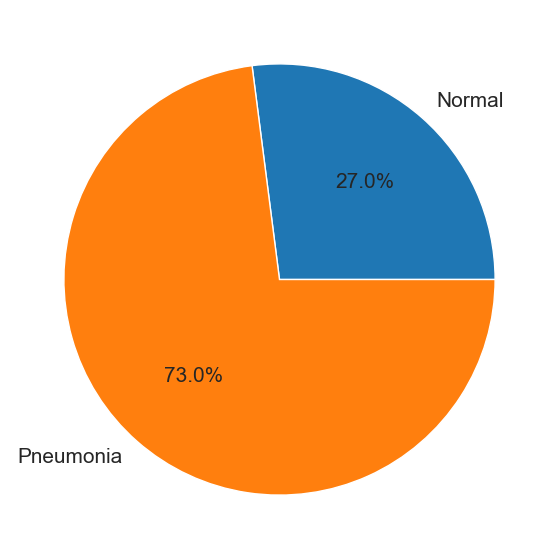

In [6]:
# 타깃값 분포
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size=15)
plt.figure(figsize=(7,7))

label = ['Normal', 'Pneumonia']

plt.pie([len(all_normal_imgs), len(all_pneumonia_imgs)], labels=label, autopct='%.1f%%')

In [9]:
# 이미지 출력
import matplotlib.gridspec as gridspec
import cv2

def show_image(img_paths, rows=2, cols=3):
    assert len(img_paths) <= rows*cols
    
    mpl.rc('font', size=8)
    plt.figure(figsize=(15,8))
    grid = gridspec.GridSpec(rows, cols)
    for idx, img_path in enumerate(img_paths):
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ax =  plt.subplot(grid[idx])
        ax.imshow(image)

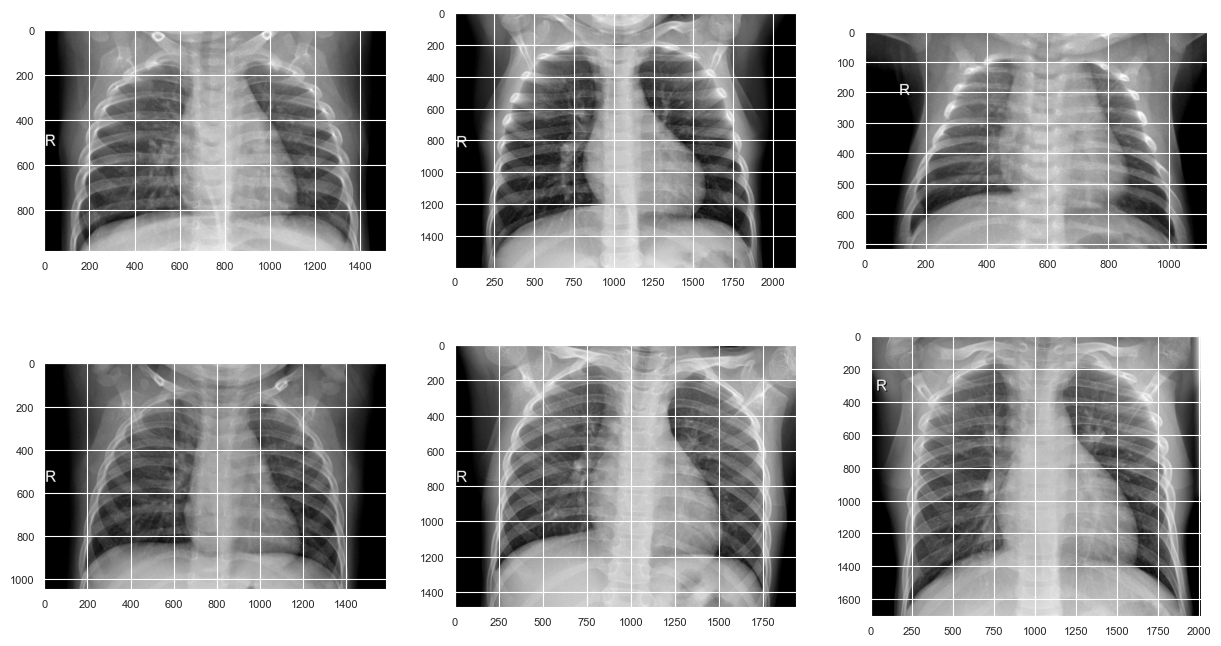

In [10]:
num_of_imgs = 6
show_image(all_normal_imgs[-6:])

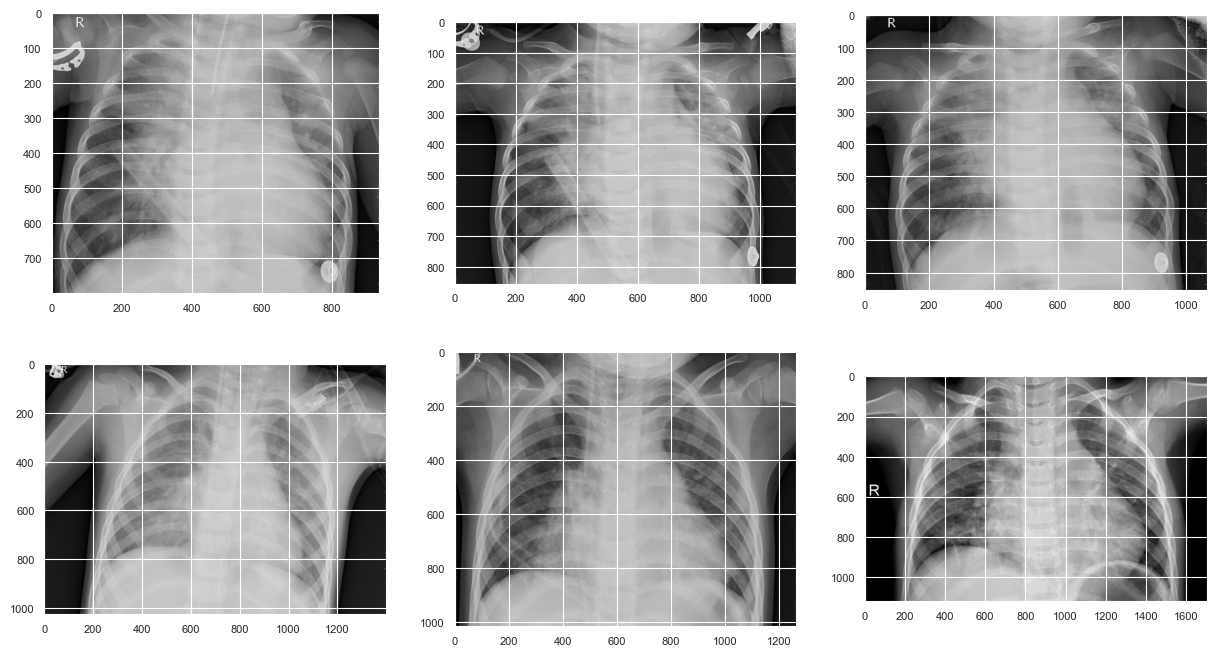

In [11]:
show_image(all_pneumonia_imgs[-6:])